# http://wirelesstag.net


DEVICE: https://fccid.io/ZGW05

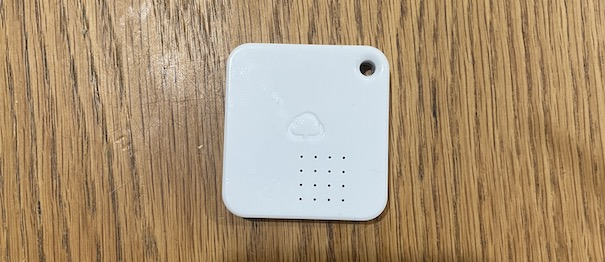

In [ ]:
from IPython.core.display import display, HTML

# Read credentials from file
with open('cred_tag.txt', 'r') as file:
    lines = file.readlines()
    client_id = lines[0].strip()
    client_secret = lines[1].strip()
    redirect_url = lines[2].strip()
    username_ = lines[3].strip()
    password_ = lines[4].strip()

In [ ]:
# Redirect user to the login page
authorize_url = f'https://www.mytaglist.com/oauth2/authorize.aspx?client_id={client_id}&redirect_uri={redirect_url}'

# Display a clickable link
display(HTML(f'<a href="{authorize_url}" target="_blank">Click here to authorise the app</a>'))

In [ ]:
import requests
authorization_code = input()

# Define the data and headers for the POST request
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'code': authorization_code
}
headers = {'Content-Type': 'application/x-www-form-urlencoded'}

# Make the POST request to get the access token
response = requests.post('https://www.mytaglist.com/oauth2/access_token.aspx', data=data, headers=headers)
response.raise_for_status()

# Extract the access token from the response
access_token = response.json()['access_token']

In [ ]:
import json

# Define the URL and headers for the API call
api_url = 'https://www.mytaglist.com/ethClient.asmx/GetTagList'
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Bearer {access_token}'
}

# Make the API call
response = requests.post(api_url, headers=headers)
response.raise_for_status()

# Extract the tag list
tag_list = response.json()['d']

# Print each tag's ID and name
for tag in tag_list:
    print(f"ID: {tag['slaveId']}, Name: {tag['name']}")

tag_id = input("Enter the number of the ID for the tag in focus ")

In [ ]:
# Define the URL, headers, and data for the API call
api_url = 'https://www.mytaglist.com/ethClient.asmx/Beep'
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Bearer {access_token}'
}
data = json.dumps({'id': tag_id, 'beepDuration': 1001})

# Make the API call
response = requests.post(api_url, headers=headers, data=data)
response.raise_for_status()

# Print the response data
print('Response data:', response.json())

In [ ]:
!pip install wirelesstagpy

In [ ]:
# USING wirelesstagpy https://pypi.org/project/wirelesstagpy/0.3.0/

import wirelesstagpy
import time
import pandas as pd

# Create a connection to the Wireless Sensor Tags platform
api = wirelesstagpy.WirelessTags(username=username_, password=password_)

# Initialise an empty DataFrame to store the sensor data
df = pd.DataFrame()

# Fetch the sensor data every second for 10 seconds
for _ in range(5):
    # Load the tags
    tags = api.load_tags()

    # Get the temperature and other metrics for the specified tag
    for (uuid, tag) in tags.items():
        if tag.tag_id == 5:
            data = pd.DataFrame({
                'time': [pd.Timestamp.now()],
                'temperature': [tag.temperature],
                'humidity': [tag.humidity],
                # add other metrics here
            })

            # Append the data to the DataFrame
            df = pd.concat([df, data], ignore_index=True)

    # Wait for 1 second
    time.sleep(5)

# Print
df

,time,temperature,humidity
0,2023-08-09 22:46:42.891433,26.574019,35.191101
1,2023-08-09 22:46:47.905231,26.574019,35.191101
2,2023-08-09 22:46:52.908197,26.574019,35.191101
3,2023-08-09 22:46:57.915549,26.574019,35.191101
4,2023-08-09 22:47:02.922739,26.574019,35.191101


# New section

In [ ]:
import json

# List of API methods to test
api_methods = [
    'GetTemperatureStats',
    'GetTemperatureStats2',
    'GetGeneralEvents',
    'GetGeneralEvents2',
    'GetHourlyStats',
    'GetHourlyStats2',
    'GetTemperatureRawData',
]

# Base URL for the API
base_url = 'https://www.mytaglist.com/ethLogs.asmx/'

# Headers for the API request
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Bearer {access_token}',
}

# Data for the API request
data = json.dumps({'id': tag_id})

# Cycle through each API method
for method in api_methods:
    # Define the URL for the API request
    url = base_url + method

    # Make the API request
    response = requests.post(url, headers=headers, data=data)

    # Print the status code
    print(f'{method}: {response.status_code}')


GetTemperatureStats: 200
GetTemperatureStats2: 200
GetGeneralEvents: 500
GetGeneralEvents2: 500
GetHourlyStats: 500
GetHourlyStats2: 500
GetTemperatureRawData: 500


In [ ]:
# Define the URL for the GetTemperatureStats API method
url = 'https://www.mytaglist.com/ethLogs.asmx/GetTemperatureStats'

# Make the API request
response = requests.post(url, headers=headers, data=data)

# Raise an exception if the request was unsuccessful
response.raise_for_status()

# Parse the response JSON
temperature_stats = response.json()

# Define a function to process the temperature stats into a DataFrame
def process_temperature_stats(stats):
    df_list = []
    # Iterate over each item in the 'd' list
    for item in stats['d']:
        # Create a DataFrame from the 'temps' and 'caps' lists
        df_item = pd.DataFrame({
            'hour': range(24),
            'temp': item['temps'],
            'cap': item['caps']
        })

        # Add a 'date' column
        df_item['date'] = pd.to_datetime(item['date'])

        # Append the DataFrame to the list
        df_list.append(df_item)

    # Concatenate all the DataFrames into a single DataFrame
    df = pd.concat(df_list, ignore_index=True)
    return df

# Process the temperature stats into a DataFrame
df1 = process_temperature_stats(temperature_stats)
df1.head(20)

,hour,temp,cap,date
0,0,26.984727,30.896650,2023-08-10
1,1,27.171856,27.533650,2023-08-10
2,2,26.469784,27.617973,2023-08-10
3,3,25.854096,27.974647,2023-08-10
4,4,25.196179,29.502672,2023-08-10
5,5,24.652496,31.231200,2023-08-10
6,6,24.221200,32.877487,2023-08-10
7,7,24.079763,34.592670,2023-08-10
8,8,25.642222,35.968690,2023-08-10
9,9,0.000000,-99.000000,2023-08-10
